MACHINE LEARNING

In [1]:
print("REDES NEURONALES")
A=4
B=5
SUMA=4+5
RESTA=5-2
print(SUMA)
print(RESTA)

key = "senati"
password = input("introduce la contraseña: ")
if  key == password.lower():
      print("La contraseña coincide")
else:
      print("La contraseña no coincide")

REDES NEURONALES
9
3
introduce la contraseña: senati
La contraseña coincide


In [2]:
# Seteando tensorflow
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0


In [3]:
# Funciones

import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import joblib

import seaborn as sns

import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Matriz de Confusión Normalizada'
        else:
            title = 'Matriz de Confusión sin Normalizar'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusión Normalizada")
    else:
        print('Matriz de Confusión sin Normalizar')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(linewidth=.0)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.tight_layout()
    plt.show()
    return ax

def saveFile(object_to_save, scaler_filename):
    joblib.dump(object_to_save, scaler_filename)

def loadFile(scaler_filename):
    return joblib.load(scaler_filename)

def plotHistogram(dataset_final):
    dataset_final.hist(figsize=(20,14), edgecolor="black", bins=40)
    plt.show()

def plotCorrelations(dataset_final):
    fig, ax = plt.subplots(figsize=(10,8))   # size in inches
    g = sns.heatmap(dataset_final.corr(), annot=True, cmap="YlGnBu", ax=ax)
    g.set_yticklabels(g.get_yticklabels(), rotation = 0)
    g.set_xticklabels(g.get_xticklabels(), rotation = 45)
    fig.tight_layout()
    plt.show()

# Funciones
def printBalanceo(data, field_grouping, data_name):
    print("\nCantidad de elementos por Clase en ", data_name, ":")
    target_count = data[field_grouping].value_counts()
    target_count.plot(kind='bar', title='Count (' + field_grouping + ')');

    print('Clase 0:', target_count[0], "({:.2%})".format(round(target_count[0] / (target_count[0]+target_count[1]), 2)))
    print('Clase 1:', target_count[1], "({:.2%})".format(round(target_count[1] / (target_count[0]+target_count[1]), 2)))
    print('Total  :', data.shape[0])

TALLER 1 DE REDES NEURONALES

In [4]:
# Importando librerías
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data_diabetes=pd.read_csv("/content/drive/MyDrive/2023/Taller01/diabetes_data.csv")
data_diabetes.head(10)


,Embarazos,Glucosa,Presion,EspesorPiel,Insulina,IMC,DiabetesFamiliar,Edad,PacienteDiabetico
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Gráfico

In [6]:
# Info
data_diabetes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Embarazos          768 non-null    int64  
 1   Glucosa            768 non-null    int64  
 2   Presion            768 non-null    int64  
 3   EspesorPiel        768 non-null    int64  
 4   Insulina           768 non-null    int64  
 5   IMC                768 non-null    float64
 6   DiabetesFamiliar   768 non-null    float64
 7   Edad               768 non-null    int64  
 8   PacienteDiabetico  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


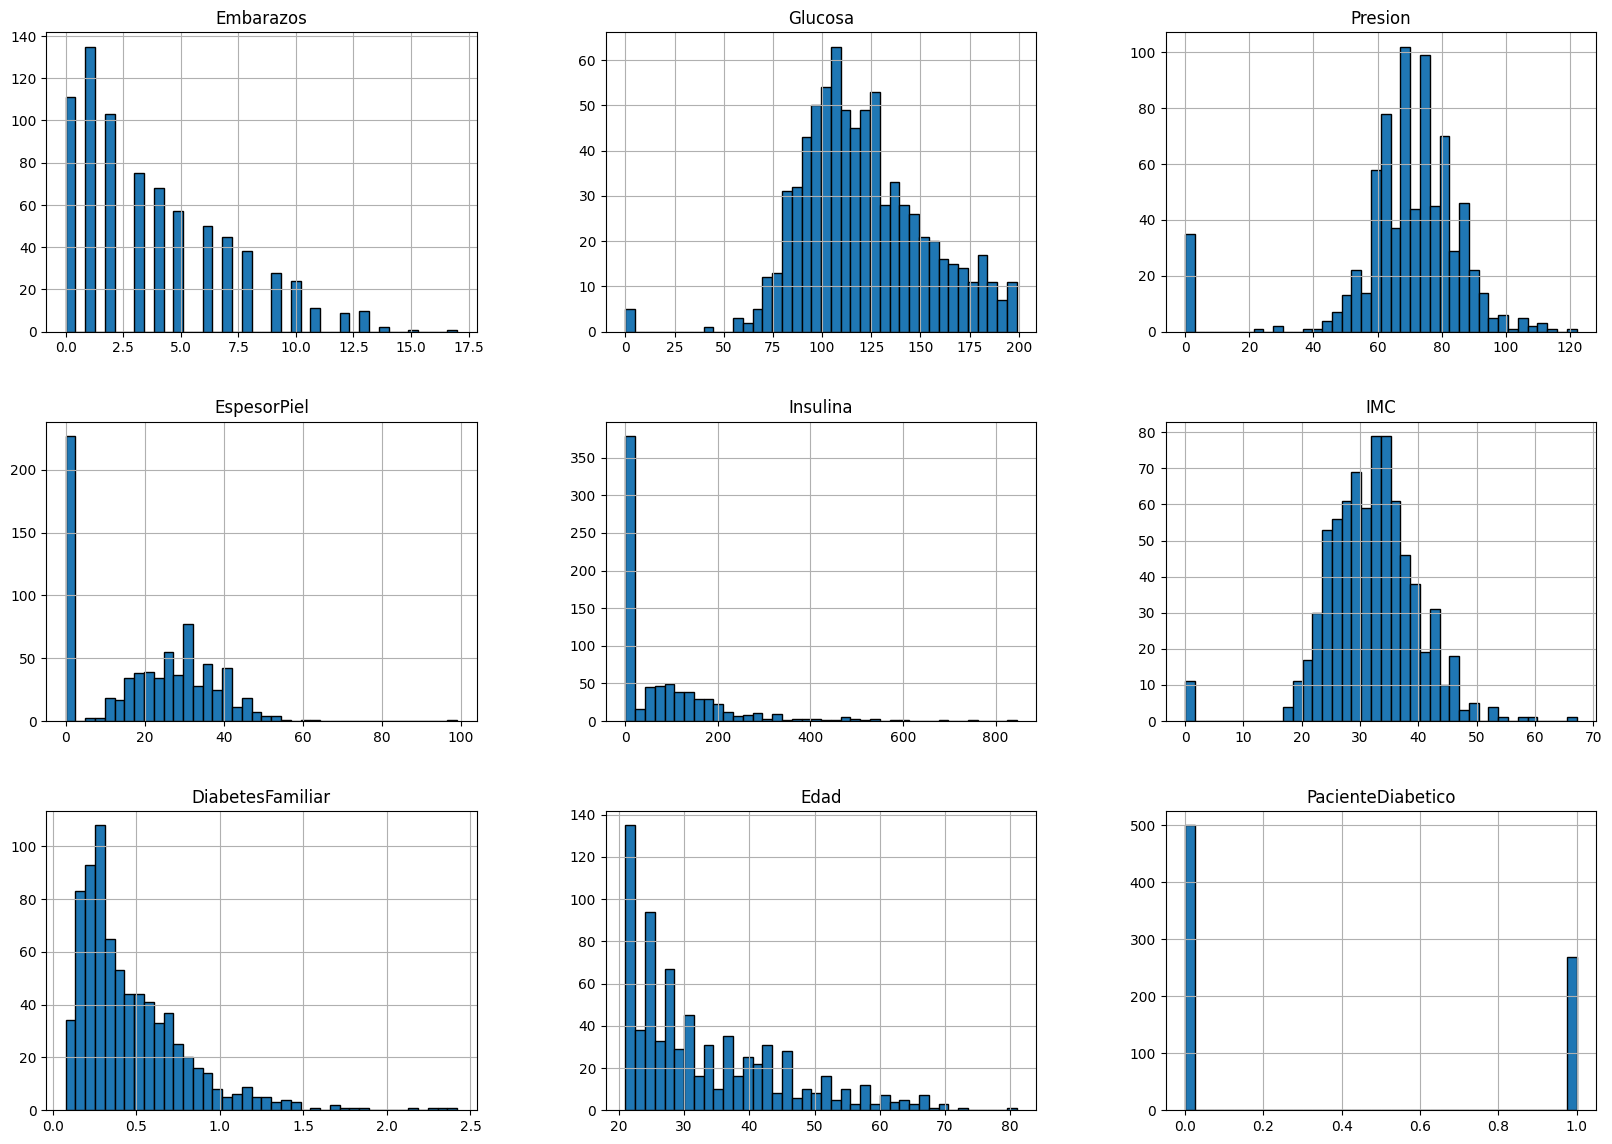

In [7]:
#Histogramas
plotHistogram(data_diabetes)


Cantidad de elementos por Clase en  DATASET ORIGINAL :
Clase 0: 500 (65.00%)
Clase 1: 268 (35.00%)
Total  : 768


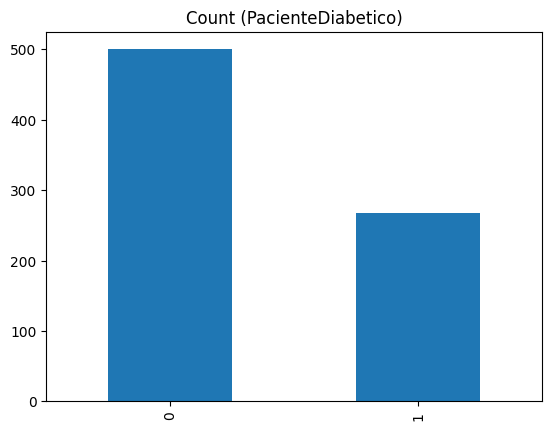

In [8]:
# Print Balanceo por clase 'PacienteDiabetico'
printBalanceo(data_diabetes, 'PacienteDiabetico', 'DATASET ORIGINAL')

In [9]:
#Escalamiento/Normalización de variables
# Obteniendo valores y nombres de columnas por separado
dataset_values = data_diabetes.values 
dataset_columns = data_diabetes.columns

# Escalamiento/Normalización de Features (variables independintes X)
# StandardScaler: (x-u)/s
stdScaler = StandardScaler()
dataset_values[:,0:-1] = stdScaler.fit_transform(dataset_values[:,0:-1])

# Dataset final normalizado
dataset_final = pd.DataFrame(dataset_values,columns=dataset_columns, dtype=np.float64)

print ("\nDataset Final:")
dataset_final.head(10)


Dataset Final:


,Embarazos,Glucosa,Presion,EspesorPiel,Insulina,IMC,DiabetesFamiliar,Edad,PacienteDiabetico
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.0
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0.0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.0
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0.0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.0
5,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760,0.0
6,-0.250952,-1.342476,-0.987710,0.719086,0.071204,-0.125977,-0.676133,-0.616111,1.0
7,1.827813,-0.184482,-3.572597,-1.288212,-0.692891,0.419775,-1.020427,-0.360847,0.0
8,-0.547919,2.381884,0.046245,1.534551,4.021922,-0.189437,-0.947944,1.681259,1.0
9,1.233880,0.128489,1.390387,-1.288212,-0.692891,-4.060474,-0.724455,1.766346,1.0



 Histogramas:


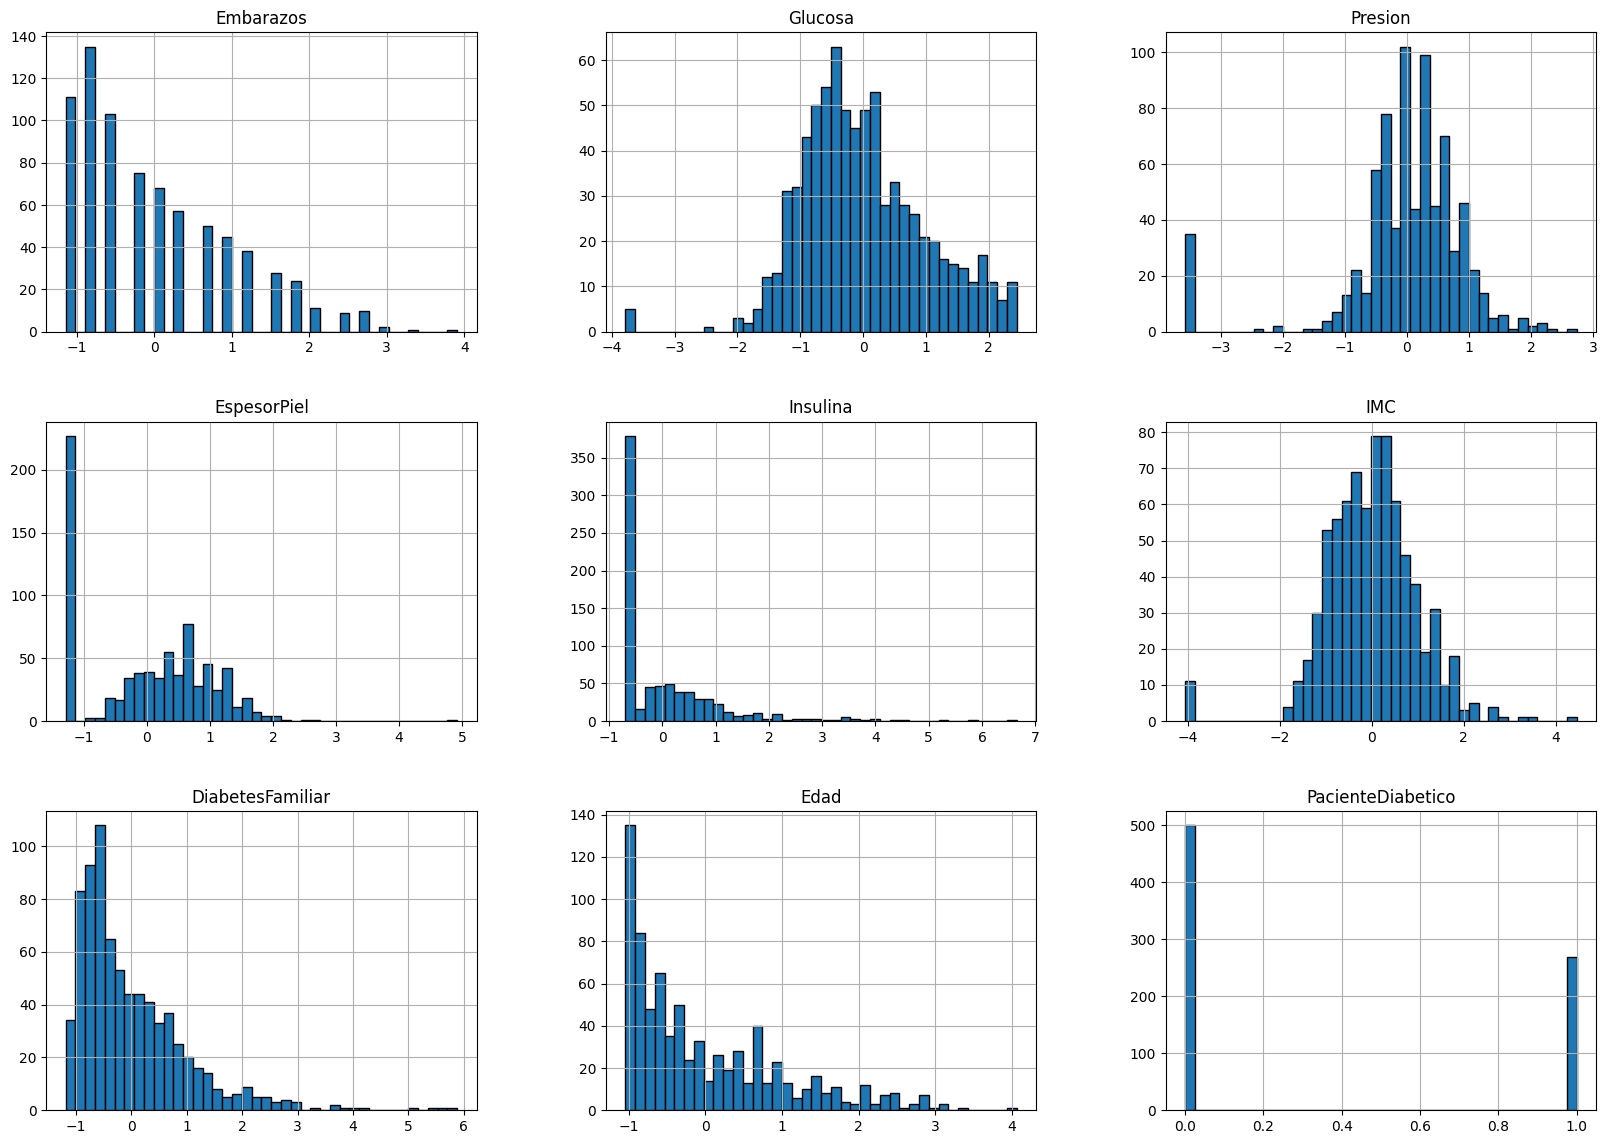


 Correlaciones:


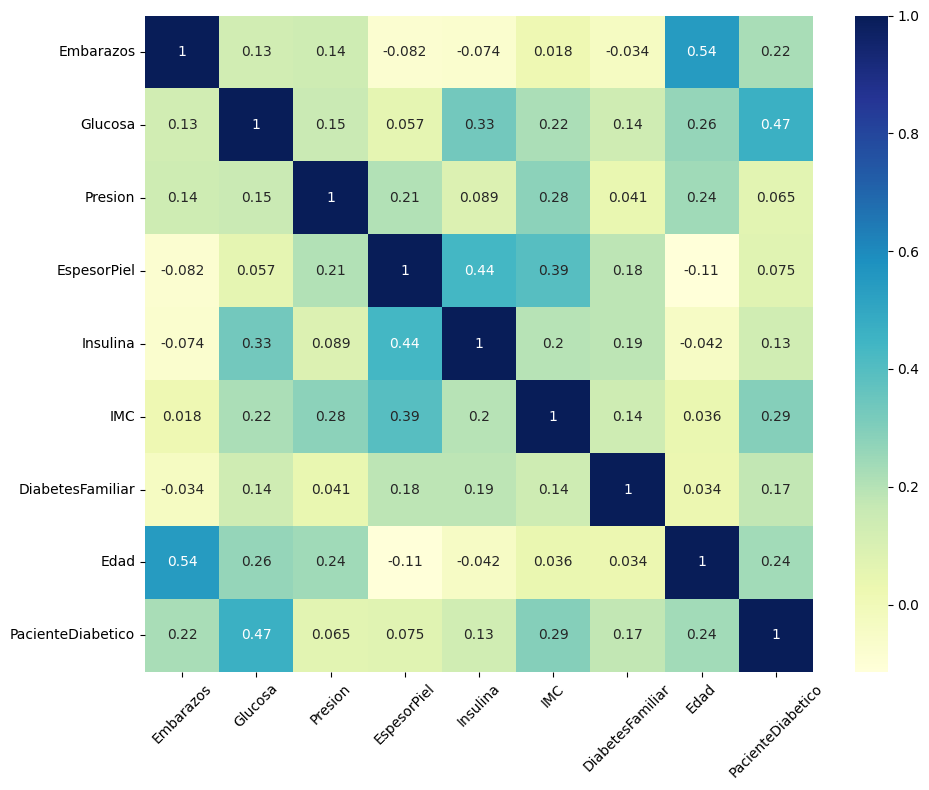

In [10]:
# Distribuciones de la data y Correlaciones
print("\n Histogramas:")
plotHistogram(dataset_final)

print("\n Correlaciones:")
plotCorrelations(dataset_final)

Diviendo la data en sers de Training y Test

In [11]:
# Dividiendo el Dataset en sets de Training y Test
train, test = train_test_split(dataset_final, test_size =0.2, random_state = 1)


Cantidad de elementos por Clase en  Dataset final (Train) :
Clase 0: 401 (65.00%)
Clase 1: 213 (35.00%)
Total  : 614


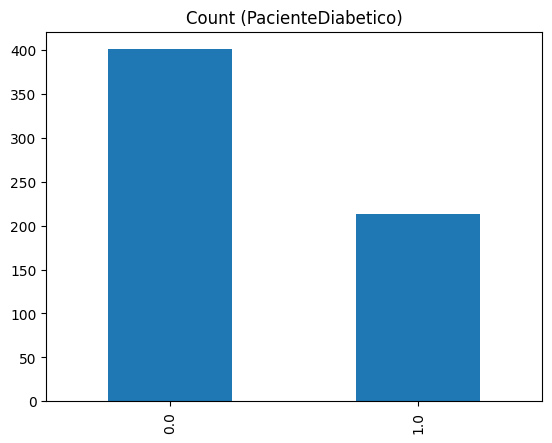

In [12]:
printBalanceo(train, 'PacienteDiabetico', 'Dataset final (Train)')


Cantidad de elementos por Clase en  Dataset final (Test) :
Clase 0: 99 (64.00%)
Clase 1: 55 (36.00%)
Total  : 154


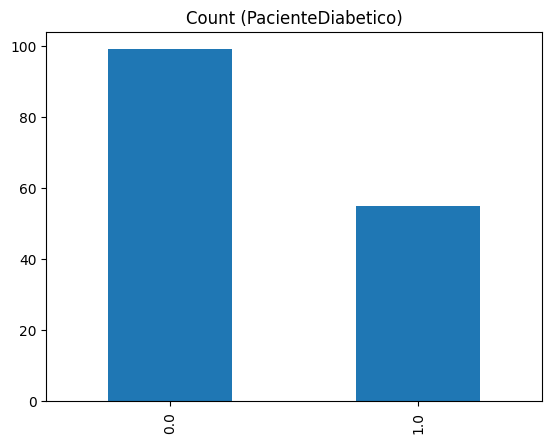

In [13]:
printBalanceo(test, 'PacienteDiabetico', 'Dataset final (Test)')

In [14]:
# Datos de Entrenamiento y Test (X vs Y)
# TRAIN
X_train = train.iloc[:, 0:-1].values #Numpy object
y_train = train.iloc[:, -1].values #Numpy object

# TEST
X_test = test.iloc[:, 0:-1].values #Numpy object
y_test = test.iloc[:, -1].values #Numpy object

PARTE II - CONSTRUYENDO LA RED NEURONAL ARTIFICIAL [8-5-3-2-1]

In [15]:
# Importando Keras y Tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomUniform

# Inicializando la Red Neuronal
neural_network = Sequential()

# kernel_initializer Define la forma como se asignará los Pesos iniciales Wi
initial_weights = RandomUniform(minval = -1.0, maxval = 1.0)
num_neuronas_entrada = X_train.shape[1]

# Agregado la Capa de entrada y la primera capa oculta
# 8 Neuronas en la capa de entrada y 5 Neuronas en la primera capa oculta
neural_network.add(Dense(units = 5, kernel_initializer = initial_weights, activation = 'sigmoid', input_dim = num_neuronas_entrada))

# Agregando capa oculta
neural_network.add(Dense(units = 4, kernel_initializer = initial_weights, activation = 'relu'))

# Agregando capa oculta
neural_network.add(Dense(units = 3, kernel_initializer = initial_weights, activation = 'relu'))

# Agregando capa de salida
neural_network.add(Dense(units = 1, kernel_initializer = initial_weights, activation = 'sigmoid'))

/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [16]:
# Imprimir Arquitectura de la Red
neural_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 45        
                                                                 
 dense_1 (Dense)             (None, 4)                 24        
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 88
Trainable params: 88
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compilando la Red Neuronal
# optimizer: Algoritmo de optimización | binary_crossentropy = 2 Classes
# loss: es el error que da el modelo, -valor + eficiente es el modelo
# accuracy: clasificación correcta que realiza el modelo

neural_network.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

ENTRENAMIENTO

In [18]:
# Entrenamiento
# batch_size = numero de datos que se introducen en la red para que entre nuestro modelo
# epoch= ciclos que duran el entrenamiento

history = neural_network.fit(X_train, y_train, batch_size = 16, epochs = 400)

Epoch 1/400
39/39 [==============================] - 7s 7ms/step - loss: 0.6109 - accuracy: 0.6564
Epoch 2/400
39/39 [==============================] - 0s 6ms/step - loss: 0.5999 - accuracy: 0.6629
Epoch 3/400
39/39 [==============================] - 0s 5ms/step - loss: 0.5901 - accuracy: 0.6726
Epoch 4/400
39/39 [==============================] - 0s 6ms/step - loss: 0.5794 - accuracy: 0.6726
Epoch 5/400
39/39 [==============================] - 0s 5ms/step - loss: 0.5689 - accuracy: 0.6889
Epoch 6/400
39/39 [==============================] - 0s 5ms/step - loss: 0.5593 - accuracy: 0.6954
Epoch 7/400
39/39 [==============================] - 0s 6ms/step - loss: 0.5511 - accuracy: 0.7052
Epoch 8/400
39/39 [==============================] - 0s 6ms/step - loss: 0.5437 - accuracy: 0.7215
Epoch 9/400
39/39 [==============================] - 0s 4ms/step - loss: 0.5369 - accuracy: 0.7362
Epoch 10/400
39/39 [==============================] - 0s 4ms/step - loss: 0.5312 - accuracy: 0.7378
Epoch 11/

PARTE III - PREDICCIONES Y EVALUACIONES DE LA RED (Modelo)

In [19]:
# Haciendo predicción de los resultados del Test
y_pred = neural_network.predict(X_test)
y_pred_norm = (y_pred > 0.5)

y_pred_norm = y_pred_norm.astype(int)
y_test = y_test.astype(int)

# 20 primeros resultados a comparar
print("\nPredicciones (20 primeros):")
print("\n\tReal", "\t", "Predicción(N)","\t", "Predicción(O)")
for i in range(20):
    print(i, '\t', y_test[i], '\t ', y_pred_norm[i], '\t \t', y_pred[i])

5/5 [==============================] - 0s 3ms/step

Predicciones (20 primeros):

	Real 	 Predicción(N) 	 Predicción(O)
0 	 0 	  [0] 	 	 [0.16865328]
1 	 0 	  [0] 	 	 [0.18101397]
2 	 0 	  [0] 	 	 [0.08874271]
3 	 0 	  [0] 	 	 [0.09424356]
4 	 0 	  [0] 	 	 [0.2298483]
5 	 0 	  [0] 	 	 [0.18369527]
6 	 0 	  [0] 	 	 [0.4093099]
7 	 0 	  [0] 	 	 [0.03088414]
8 	 0 	  [0] 	 	 [0.05630244]
9 	 0 	  [0] 	 	 [0.11634708]
10 	 0 	  [1] 	 	 [0.5048747]
11 	 0 	  [0] 	 	 [0.09499761]
12 	 1 	  [1] 	 	 [0.8478935]
13 	 1 	  [1] 	 	 [0.7936766]
14 	 0 	  [0] 	 	 [0.06181487]
15 	 1 	  [1] 	 	 [0.74626756]
16 	 1 	  [0] 	 	 [0.37308934]
17 	 0 	  [0] 	 	 [0.27751648]
18 	 0 	  [0] 	 	 [0.08049261]
19 	 0 	  [0] 	 	 [0.16777742]


MÉTRICAS

In [20]:
# Métricas:
# Aplicando la Matriz de Confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_norm)
print ("\nMatriz de Confusión: \n", cm)

TP = cm[1,1]
FP = cm[0,1]
TN = cm[0,0]
FN = cm[1,0]

# Accuracy
accuracy = (TP+TN)/(TP+TN+FP+FN)
# Sensitivity/Recall
sensitivity = TP/(TP+FN)


# Accuracy: representa el porcentaje total de valores correctamente clasificados
print("Accuracy: ","({:.2%})".format(accuracy))
# Sensibilidad: Representa la fracción de verdaderos positivos
print("Sensitivity:","({:.2%})".format(sensitivity))



Matriz de Confusión: 
 [[87 12]
 [15 40]]
Accuracy:  (82.47%)
Sensitivity: (72.73%)
